In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (10, 5)
def plt_image(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [3]:
def count_coin(img, min_radius=25, max_radius=150):
    edges = cv2.Canny(img, 50, 200)

    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=6)

    c_img = closing.copy()

    contours, hierarchy = cv2.findContours(c_img, cv2.RETR_EXTERNAL,
                                           cv2.CHAIN_APPROX_SIMPLE)

    coin_cnt = 0

    for cnt in contours:
        ((x, y), radius) = cv2.minEnclosingCircle(cnt)
        area = cv2.contourArea(cnt)

        if not min_radius < radius < max_radius:
            continue

        if not min_radius ** 2 < area < max_radius ** 2:
            continue

        coin_cnt += 1
        
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(img, ellipse, (0, 255, 0), 2)
        cv2.putText(img, str(coin_cnt), (int(x)+30, int(y)-40), cv2.FONT_HERSHEY_SIMPLEX, 1.2, 0, 2)

    return img, coin_cnt

Coin Count: 8


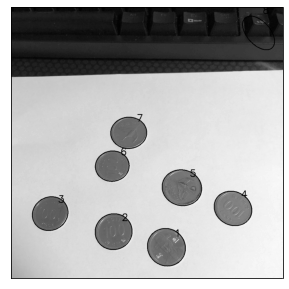

In [10]:
orig_img = cv2.imread('Coin7.jpg', 0)
roi = orig_img.copy()[1:1000, 1:1000]

coin, coin_cnt = count_coin(roi)

print(f'Coin Count: {coin_cnt}')
plt_image(roi)

Coin Count: 3


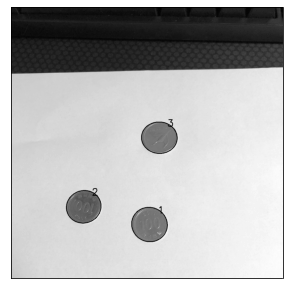

In [11]:
coin_img = cv2.imread('coin3.jpg', 0)
roi = coin_img.copy()[1:1000, 1:1000]

coin, coin_cnt = count_coin(roi, min_radius=60, max_radius=140)

print(f'Coin Count: {coin_cnt}')
plt_image(coin)